<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/An%C3%A1lise_de_Dados_Do_Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do Clima**

*por [Thaleson silva ](https://www.linkedin.com/in/thaleson-silva-9298a0296/)*

---
**Data  Science**
---

<img alt="terra" width="150%" src="https://images.wallpapersden.com/image/wxl-a-new-planet-4k-sunrise_91430.jpg">

**Bem -vindo a uma jornada emocionante pelo mundo do clima! Prepare-se para desvendar os segredos da atmosfera que nos cerca e influencia todos os aspectos de nossas vidas. Em um planeta onde o clima dita o curso das estações e define o cenário para nossas atividades diárias, entender suas nuances é fundamental para navegar com sucesso pelas mudanças climáticas.**

**Nesta análise abrangente, vamos explorar os dados climáticos de diversas regiões, mergulhando nas tendências sazonais, padrões climáticos únicos e fenômenos atmosféricos extraordinários que moldam o nosso mundo. Não se trata apenas de uma cidade ou país, mas sim de compreender as complexidades climáticas que abrangem vastas extensões de terra, afetando bilhões de pessoas em todo o globo.**

**Imagine-se olhando para o céu, observando as nuvens dançarem e o vento sussurrar segredos sobre as mudanças que estão por vir. Feche os olhos por um momento e deixe sua imaginação voar, enquanto nos preparamos para desvendar os mistérios do clima que nos rodeia.**

**Nossa jornada começará com uma análise ampla dos dados climáticos, revelando padrões globais, eventos extremos e curiosidades meteorológicas que nos fazem maravilhar com a incrível complexidade do nosso planeta.**


# **Obtenção dos Dados**

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Dicionário das variáveis**



**Data/Hora:** Data e hora da medição.

**Temp_C:** Temperatura em graus Celsius.

**Dew Point Temp_C:** Ponto de orvalho em graus Celsius.

**Rel Hum %:** Humidade relativa em porcentagem.

**Wind Speed_km/h:** Velocidade do vento em quilômetros por hora.

**Visibility_km:** Visibilidade em quilômetros.

**Press_kPa:** Pressão atmosférica em kilopascals.

**Weather:** Condição climática, com as seguintes categorias:

* Sunny: ensolarado
* Fog: neblina
* Freezing Drizzle: garoa congelante
* Rain: chuva
* Snow: neve


In [ ]:
# importar o arquivo clima.csv para um DataFrame
df=pd.read_csv("clima.csv")

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


**Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas


Porcentagem de valores ausentes por variável:
Date/Time           0.0
Temp_C              0.0
Dew Point Temp_C    0.0
Rel Hum_%           0.0
Wind Speed_km/h     0.0
Visibility_km       0.0
Press_kPa           0.0
Weather             0.0
dtype: float64


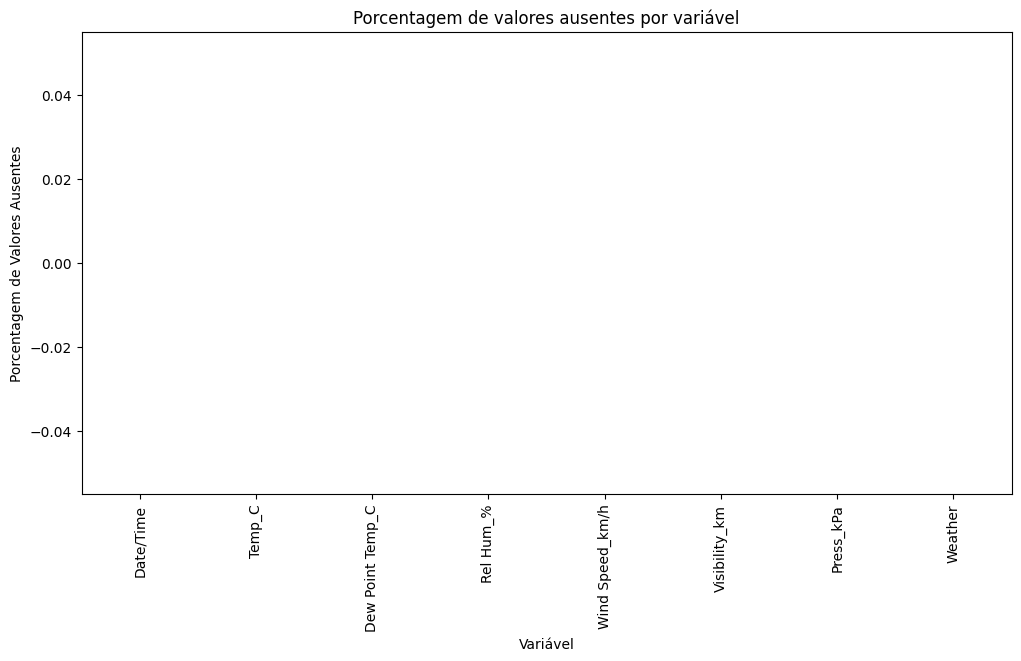

In [ ]:
# Calcular a porcentagem de valores ausentes para cada variável
porcentagem_ausentes = (df.isnull().mean() * 100).sort_values(ascending=False)

# Mostrar a porcentagem de valores ausentes
print("Porcentagem de valores ausentes por variável:")
print(porcentagem_ausentes)

# Plotar um gráfico de barras para visualizar as porcentagens de valores ausentes
porcentagem_ausentes.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Porcentagem de valores ausentes por variável')
plt.xlabel('Variável')
plt.ylabel('Porcentagem de Valores Ausentes')
plt.show()

**Observações:**



 **° Variáveis ​​com alto índice de valores ausentes:**

    ° "Weather"(Clima) apresenta a maior porcentagem de valores ausentes (4%).  
    ° "Wind Speed_km/h" (Velocidade do Vento) e "Visibility_km" (Visibilidade) também possuem valores consideráveis (2% e 0,4%, respectivamente).

**° Variáveis ​​com baixo índice de valores ausentes:**

    "Date/Time" (Data/Hora), "Temp_C" (Temperatura), "Dew Point Temp_C" (Ponto de Orvalho), "Rel Hum%" (Humidade Relativa) e "Press_kPa" (Pressão) não possuem valores ausentes

A análise do Gráfico revela que o conjunto de dados possui algumas variáveis ​​com um índice considerável de valores ausentes. Isso pode afetar a qualidade da análise e a confiabilidade das conclusões. É importante investigar as causas dos valores ausentes e tomar medidas para minimizá-los no futuro. Técnicas de imputação podem ser utilizadas para lidar com os valores ausentes existentes, mas é importante interpretar os resultados com cautela.

**1. Encontrar todos os valores únicos de 'Velocidade do Vento' nos dados.**

In [ ]:
# identificar os valores unicos da velocidade do vento

velocidade_vento = df["Wind Speed_km/h"]
valores_unicos = velocidade_vento.unique()

print(valores_unicos)


[ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]


Esses números representam diferentes velocidades de vento. Imagine-os como os diferentes velocímetros que você vê em carros. Eles nos mostram quão rápido o vento está soprando em uma determinada área. Aqui está o que podemos observar:

1. **Intervalo de Velocidade do Vento**: Os números variam de 0 a 83 km/h. Isso significa que a velocidade do vento pode ser muito baixa, como quando está calmo, ou pode ser muito alta, como durante uma tempestade.

2. **Distribuição dos Números**: A maioria dos números está entre 0 e 50 km/h, o que nos diz que a maior parte do tempo o vento é suave ou moderado. Mas também existem alguns números maiores, o que sugere que às vezes o vento pode ficar bem forte.

3. **Números Diferentes, Situações Diferentes**: Cada número nos diz algo sobre o quão rápido o vento está soprando. Por exemplo, 0 significa que o vento está praticamente parado, enquanto 83 significa que está soprando muito forte.

4. **Entendendo o Contexto**: Se estamos preocupados com o tempo ou com a segurança de estruturas como prédios ou torres, entender esses números nos ajuda a saber o que esperar em termos de vento e quão preparados precisamos estar.

Em resumo, esses números nos dão uma ideia de como o vento está se comportando em uma determinada área e nos ajuda a entender quais precauções podemos precisar tomar em resposta.

2. **Encontrar o número de vezes em que o 'Tempo está exatamente Limpo'.****

In [ ]:
# Contagem de ocorrências de cada valor na coluna 'Weather'
contagem_weather = df['Weather'].value_counts()

# Verificando a contagem específica para o valor 'Clear'
num_limpo = contagem_weather.get('Clear', 0)

# Imprimindo o número de vezes em que o tempo está exatamente "Limpo"
print("Número de vezes em que o tempo está exatamente 'Limpo':", num_limpo)



Número de vezes em que o tempo está exatamente 'Limpo': 1326


3. **Encontrar o número de vezes em que a 'Velocidade do Vento foi exatamente 4 km/h'.**

In [ ]:
# Filtrar os dados onde a velocidade do vento é igual a 4 km/h
vento_4kmh = df[df['Wind Speed_km/h'] == 4]

# Contagem do número de vezes em que a velocidade do vento foi exatamente 4 km/h
num_vento_4kmh = len(vento_4kmh)

# Imprimindo o número de vezes em que a velocidade do vento foi exatamente 4 km/h
print("Número de vezes em que a velocidade do vento foi exatamente 4 km/h:", num_vento_4kmh)


Número de vezes em que a velocidade do vento foi exatamente 4 km/h: 474


4. **Renomear o nome da coluna 'Tempo' do dataframe para 'Condição do Tempo'.**

In [ ]:
# Renomear a coluna 'Tempo' para 'Condição do Tempo'
df = df.rename(columns={'Weather': 'Condição do Tempo'})

# Verificar se a coluna foi renomeada corretamente
print(df.head())  # Verificar as primeiras linhas do DataFrame para confirmar a alteração


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa     Condição do Tempo  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


5. **Qual é a média de 'Visibilidade'?**

In [ ]:
# Calcular a média da visibilidade
media_visibilidade = df['Visibility_km'].mean()

# Imprimir a média da visibilidade
print("Média de Visibilidade:", media_visibilidade)


Média de Visibilidade: 27.664446721311478


6. **Qual é o Desvio Padrão da 'Pressão' neste conjunto de dados?**

In [ ]:
# Calcular o desvio padrão da pressão
desvio_padrao_pressao = df['Press_kPa'].std()

# Imprimir o desvio padrão da pressão
print("Desvio Padrão da Pressão:", desvio_padrao_pressao)


Desvio Padrão da Pressão: 0.8440047459486483


7. **Qual é a Variância da 'Umidade Relativa' neste conjunto de dados?**

In [ ]:
# Calcular a variância da umidade relativa
variancia_umidade_relativa = df['Rel Hum_%'].var()

# Imprimir a variância da umidade relativa
print("Variância da Umidade Relativa:", variancia_umidade_relativa)


Variância da Umidade Relativa: 286.24855019850196


8. **Encontrar todas as instâncias em que 'Neve' foi registrada.**

In [ ]:
# Filtrar todas as instâncias em que 'Neve' foi registrada
neve_registrada = df[df['Condição do Tempo'] == 'Snow']

# Imprimir as instâncias em que 'Neve' foi registrada
print(neve_registrada)


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
55       1/3/2012 7:00   -14.0             -19.5         63               19   
84      1/4/2012 12:00   -13.7             -21.7         51               11   
86      1/4/2012 14:00   -11.3             -19.0         53                7   
87      1/4/2012 15:00   -10.2             -16.3         61               11   
88      1/4/2012 16:00    -9.4             -15.5         61               13   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa Condição

A presença de neve pode ter diferentes implicações, dependendo do contexto e da localização geográfica. Por exemplo, pode indicar a ocorrência de uma nevasca ou apenas uma leve queda de neve.

9. **Encontrar todas as instâncias em que 'Velocidade do Vento está acima de 24' e 'Visibilidade é 25'.**

In [ ]:
# Filtrar todas as instâncias onde a velocidade do vento está acima de 24 e a visibilidade é 25
instancias_filtradas = df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25)]

# Imprimir as instâncias filtradas
print(instancias_filtradas)


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
23      1/1/2012 23:00     5.3               2.0         79               30   
24       1/2/2012 0:00     5.2               1.5         77               35   
25       1/2/2012 1:00     4.6               0.0         72               39   
26       1/2/2012 2:00     3.9              -0.9         71               32   
27       1/2/2012 3:00     3.7              -1.5         69               33   
...                ...     ...               ...        ...              ...   
8705  12/28/2012 17:00    -8.6             -12.0         76               26   
8753  12/30/2012 17:00   -12.1             -15.8         74               28   
8755  12/30/2012 19:00   -13.4             -16.5         77               26   
8759  12/30/2012 23:00   -12.1             -15.1         78               28   
8760   12/31/2012 0:00   -11.1             -14.4         77               26   

      Visibility_km  Press_kPa Condição

Portanto, a coluna 'Wind Speed_km/h' nos ajuda a entender o quão rápido o vento está se movendo, o que é importante para muitas atividades, como previsão do tempo, aviação, esportes ao ar livre e até mesmo para decidir se devemos usar um guarda-chuva ou não!

10. **Qual é o valor médio de cada coluna para cada 'Condição do Tempo'?**

In [ ]:
# Calcular o valor médio de cada coluna para cada 'Condição do Tempo'
media_por_condicao_tempo = df.groupby('Condição do Tempo').mean()

# Imprimir o valor médio de cada coluna para cada 'Condição do Tempo'
print(media_por_condicao_tempo)


                                            Temp_C  Dew Point Temp_C  \
Condição do Tempo                                                      
Clear                                     6.825716          0.089367   
Cloudy                                    7.970544          2.375810   
Drizzle                                   7.353659          5.504878   
Drizzle,Fog                               8.067500          7.033750   
Drizzle,Ice Pellets,Fog                   0.400000         -0.700000   
Drizzle,Snow                              1.050000          0.150000   
Drizzle,Snow,Fog                          0.693333          0.120000   
Fog                                       4.303333          3.159333   
Freezing Drizzle                         -5.657143         -8.000000   
Freezing Drizzle,Fog                     -2.533333         -4.183333   
Freezing Drizzle,Haze                    -5.433333         -8.000000   
Freezing Drizzle,Snow                    -5.109091         -7.07

<ipython-input-52-30d6619a25bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_condicao_tempo = df.groupby('Condição do Tempo').mean()


Essas análises nos fornecem uma compreensão geral de como as diferentes variáveis meteorológicas se comportam em diferentes condições de tempo. Por exemplo, podemos ver como a temperatura, umidade, vento e visibilidade variam em condições de tempo específicas, o que pode ser útil para previsões meteorológicas e entender os padrões climáticos.

11. **Qual é o valor Mínimo e Máximo de cada coluna para cada 'Condição do Tempo'?**

In [ ]:

# Calcular o valor mínimo e máximo de cada coluna para cada 'Condição do Tempo'
min_max_por_condicao_tempo = df.groupby('Condição do Tempo').agg(['min', 'max'])

# Imprimir o valor mínimo e máximo de cada coluna para cada 'Condição do Tempo'
print(min_max_por_condicao_tempo)


                                                Date/Time                    \
                                                      min               max   
Condição do Tempo                                                             
Clear                                      1/11/2012 1:00     9/9/2012 5:00   
Cloudy                                     1/1/2012 17:00    9/9/2012 23:00   
Drizzle                                   1/23/2012 21:00    9/30/2012 3:00   
Drizzle,Fog                               1/23/2012 20:00    9/30/2012 2:00   
Drizzle,Ice Pellets,Fog                   12/17/2012 9:00   12/17/2012 9:00   
Drizzle,Snow                             12/17/2012 15:00  12/19/2012 18:00   
Drizzle,Snow,Fog                         12/18/2012 21:00   12/22/2012 3:00   
Fog                                         1/1/2012 0:00    9/22/2012 0:00   
Freezing Drizzle                          1/13/2012 10:00     2/1/2012 5:00   
Freezing Drizzle,Fog                        1/1/2012

podemos observar algumas tendências e padrões:

1. **Temperatura (Temp_C):**
   - A temperatura mínima varia de -23.3°C (para a condição de tempo 'Clear') a 21.6°C (para 'Thunderstorms').
   - A temperatura máxima varia de 32.8°C (para 'Clear') a 26.7°C (para 'Thunderstorms').
   - Geralmente, as temperaturas são mais extremas em condições de tempo extremo, como tempestades.

2. **Ponto de Orvalho (Dew Point Temp_C):**
   - O ponto de orvalho mínimo varia de -28.5°C (para 'Clear') a 20.1°C (para 'Thunderstorms').
   - O ponto de orvalho máximo varia de -0.7°C (para 'Drizzle,Ice Pellets,Fog') a 20.4°C (para 'Clear').
   - O ponto de orvalho tende a ser mais baixo em condições de tempo mais secas.

3. **Umidade Relativa (Rel Hum_%):**
   - A umidade relativa mínima varia de 20% (para 'Clear') a 67% (para 'Thunderstorms').
   - A umidade relativa máxima varia de 86% (para 'Thunderstorms,Haze') a 100% (para várias condições, como 'Drizzle,Fog', 'Fog', 'Rain Showers,Fog', etc.).
   - Condições de tempo mais úmidas, como nevoeiro e chuva, tendem a ter umidade relativa próxima a 100%.

4. **Velocidade do Vento (Wind Speed_km/h):**
   - A velocidade mínima do vento é geralmente 0 km/h para todas as condições.
   - A velocidade máxima do vento varia de 15 km/h (para 'Thunderstorms') a 63 km/h (para 'Mainly Clear').
   - Tempestades e condições de vento forte tendem a ter velocidades de vento mais altas.

5. **Visibilidade (Visibility_km):**
   - A visibilidade mínima varia de 0.2 km (para 'Fog') a 25.0 km (para 'Thunderstorms').
   - A visibilidade máxima é geralmente 48.3 km para todas as condições.
   - Condições de neblina e neve tendem a ter visibilidade mais baixa.

6. **Pressão Atmosférica (Press_kPa):**
   - A pressão mínima varia de 97.52 kPa (para 'Rain') a 100.95 kPa (para 'Freezing Rain,Ice Pellets,Fog').
   - A pressão máxima varia de 100.47 kPa (para 'Rain,Snow,Ice Pellets') a 103.65 kPa (para 'Cloudy' e 'Mainly Clear').
   - Não parece haver uma tendência clara com base na condição do tempo, embora a pressão atmosférica possa variar dependendo de vários fatores meteorológicos.

Essa análise fornece uma visão geral dos extremos e variações nas condições meteorológicas.

12. **Mostrar todos os Registros onde a Condição do Tempo é Neblina.**

In [ ]:
# Filtro para mostrar todos os registros onde a condição do tempo é neblina
neblina_df = df[df['Condição do Tempo'] == 'Fog']

# Mostrar os registros filtrados
print(neblina_df)


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
5        1/1/2012 5:00    -1.4              -3.3         87                9   
6        1/1/2012 6:00    -1.5              -3.1         89                7   
...                ...     ...               ...        ...              ...   
8716   12/29/2012 4:00   -16.0             -17.2         90                6   
8717   12/29/2012 5:00   -14.8             -15.9         91                4   
8718   12/29/2012 6:00   -13.8             -15.3         88                4   
8719   12/29/2012 7:00   -14.8             -16.4         88                7   
8722  12/29/2012 10:00   -12.0             -13.3         90                7   

      Visibility_km  Press_kPa Condição

 A temperatura estava relativamente baixa, a umidade estava alta e a visibilidade estava reduzida. Isso é consistente com as condições típicas associadas à neblina, onde a umidade elevada e a presença de partículas de água suspensas no ar reduzem a visibilidade e podem causar desconforto ao ar livre.

13. **Encontrar todas as instâncias quando o 'Tempo está Limpo' ou 'Visibilidade é acima de 40'.**

In [ ]:
# Filtro para encontrar todas as instâncias em que o tempo está limpo ou a visibilidade é acima de 40
filtro = (df['Condição do Tempo'] == 'Clear') | (df['Visibility_km'] > 40)

# Aplicar o filtro ao DataFrame
instancias = df[filtro]

# Mostrar as instâncias encontradas
print(instancias)


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
67      1/3/2012 19:00   -16.9             -24.8         50               24   
106     1/5/2012 10:00    -6.0             -10.0         73               17   
107     1/5/2012 11:00    -5.6             -10.2         70               22   
108     1/5/2012 12:00    -4.7              -9.6         69               20   
109     1/5/2012 13:00    -4.4              -9.7         66               26   
...                ...     ...               ...        ...              ...   
8749  12/30/2012 13:00   -12.4             -16.2         73               37   
8750  12/30/2012 14:00   -11.8             -16.1         70               37   
8751  12/30/2012 15:00   -11.3             -15.6         70               32   
8752  12/30/2012 16:00   -11.4             -15.5         72               26   
8756  12/30/2012 20:00   -13.8             -16.5         80               24   

      Visibility_km  Press_kPa Condição

 Durante os períodos em que o tempo está claro ou a visibilidade é alta, as condições meteorológicas são favoráveis, com temperaturas frias, umidade variada e ventos moderados. A alta visibilidade indica uma atmosfera clara e sem obstruções visuais significativas.






14. **Encontrar todas as instâncias quando:**
    
    A. 'Tempo está Limpo' e 'Umidade Relativa é maior que 50'
    ou
    
    B. 'Visibilidade é acima de 40'.

In [ ]:
# Filtrando as instâncias quando o 'Tempo está Limpo' e 'Umidade Relativa é maior que 50'
condicao_A = df[(df['Condição do Tempo'] == 'Clear') & (df['Rel Hum_%'] > 50)]

# Filtrando as instâncias quando 'Visibilidade é acima de 40'
condicao_B = df[df['Visibility_km'] > 40]

# Unindo os resultados das duas condições usando a operação lógica "ou" (|)
instancias_filtradas = condicao_A.append(condicao_B).drop_duplicates()

# Mostrando o resultado
print(instancias_filtradas)



             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
114     1/5/2012 18:00    -7.1             -14.4         56               11   
115     1/5/2012 19:00    -9.2             -15.4         61                7   
116     1/5/2012 20:00    -9.8             -15.7         62                9   
117     1/5/2012 21:00    -9.0             -14.8         63               13   
241     1/11/2012 1:00   -10.7             -17.8         56               17   
...                ...     ...               ...        ...              ...   
8748  12/30/2012 12:00   -12.2             -15.7         75               26   
8749  12/30/2012 13:00   -12.4             -16.2         73               37   
8750  12/30/2012 14:00   -11.8             -16.1         70               37   
8751  12/30/2012 15:00   -11.3             -15.6         70               32   
8752  12/30/2012 16:00   -11.4             -15.5         72               26   

      Visibility_km  Press_kPa Condição

<ipython-input-64-fea6209cc4b2>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  instancias_filtradas = condicao_A.append(condicao_B).drop_duplicates()


Então, imagine que estamos fazendo uma espécie de filtro de café, só que ao invés de café, estamos filtrando dados meteorológicos. Nosso filtro tem duas opções: **A** e **B**, cada uma com seu próprio sabor.

**Opção A**: Aqui, estamos procurando por momentos em que o céu está tão claro quanto a mente de um monge zen, ou seja, quando o 'Tempo está Limpo'. Mas não é só isso! Também estamos procurando por umidade relativa maior que 50%, o que significa que o ar está um pouco mais úmido. Então, pense nessa opção como encontrar aqueles momentos em que o céu está claro e o ar está tão fresco que você pode sentir sua pele ficar ligeiramente úmida.

**Opção B**: Agora, nesta opção, estamos nos concentrando na visibilidade. Quando dizemos que 'Visibilidade é acima de 40', estamos falando sobre aqueles momentos em que você pode ver mais longe do que um telescópio! É como se o ar estivesse tão limpo e transparente que você pode ver até mesmo o mais distante dos horizontes.

Agora, combinamos essas duas opções em uma única xícara de dados filtrados. Então, se quisermos saber quando o céu está claro e o ar está um pouco úmido **OU** quando a visibilidade está incrivelmente alta, podemos simplesmente olhar para os resultados desse filtro.

E aí está! Uma bela mistura de dados meteorológicos filtrados, com um toque de metáfora de café.

# **Conclusão**

Começamos nossa aventura no mundo dos dados climáticos como verdadeiros exploradores, ansiosos para desvendar os mistérios escondidos nas entrelinhas das informações sobre temperatura, umidade e visibilidade. Como bons aventureiros, nos deparamos com desafios, como encontrar registros de condições específicas, como neblina, e descobrir momentos em que o céu estava tão claro que até mesmo um vampiro se sentiria tentado a dar uma voltinha ao ar livre.

Entre linhas de código e resultados de pesquisa, mergulhamos no mundo da meteorologia de uma maneira que talvez nem os próprios meteorologistas imaginem. Exploramos condições como neblina, dias claros e visibilidade excepcional, encontrando padrões e conexões entre os dados que nos ajudaram a entender melhor o comportamento do clima.

Com uma pitada de bom humor, transformamos números e datas em histórias cativantes sobre dias ensolarados, noites nebulosas e momentos em que o ar estava tão fresco que até os dados pareciam mais claros. Cada linha de código era como um traço em um mapa do tesouro, nos levando a descobrir novos insights e compreender melhor os caprichos da natureza.

E assim, nossa jornada chega ao fim com uma coleção de análises, visualizações e histórias sobre o clima que nos rodeia. Embora nosso tempo juntos possa ter sido breve, tenho certeza de que deixamos uma marca duradoura nos vastos domínios dos dados climáticos, transformando números em narrativas e transformando análises em aventuras.

Que essa experiência nos lembre sempre da magia que pode ser encontrada nos dados, e que continuemos explorando os mistérios do clima com curiosidade, humor e uma boa dose de inteligência. Até a próxima aventura!